<!--NOTEBOOK_INFORMATION-->
<img id="r-1060983" data-claire-element-id="1061343" src="http://www.siteduzero.com/favicon.ico" alt="Image utilisateur">
    <p>
        **<font color='#D2691E'size="6">Tags recommendation (1/7)</font>**.
    </p>
    <p>
        This notebook contains the project's preprocessing steps
    </p>

<p>
    <center>
        **<font color='	#D2691E'size="6">PLAN</font>**
    </center>
</p>

<p>
        **<font color='#D2691E'size="4">0) Libraries, functions and datasources import</font>**
</p>
<p>
        **<font color='#D2691E'size="4">I) Preprocessing</font>**
</p>
<p>
        **<font color='#D2691E'size="4">II) Normalization and Cleaning</font>**
</p>
<p>
        **<font color='#D2691E'size="4">III) Tags perimeter</font>**
</p>
<p>
        **<font color='#D2691E'size="4">III.1) 50 most frequent tags analysis</font>**
</p>
<p>
        **<font color='#D2691E'size="4">III.2) Tags filtering on accrued frequencies</font>**
</p>
<p>
        **<font color='#D2691E'size="4">IV) Tokenization</font>**
</p>
<p>
        **<font color='#D2691E'size="4">V) Quality control before stopwords management and lemmatization</font>**
</p>
<p>
        **<font color='#D2691E'size="4">V.1) Quality control : All Tags vs all corpus</font>**
</p>
<p>
        **<font color='#D2691E'size="4">V.2) Quality control : 1 Tag vs 1 message</font>**
</p>
<p>
        **<font color='#D2691E'size="4">VI) Stopwords processing</font>**
</p>
<p>
        **<font color='#D2691E'size="4">VII) Lemmatization</font>**
</p>
<p>
        **<font color='#D2691E'size="4">VIII) Corpus stopwords management</font>**
</p>
<p>
        **<font color='#D2691E'size="4">VIII.1) Words frequencies analysis</font>**
</p>
<p>
        **<font color='#D2691E'size="4">VIII.2) Dumping the list of the corpus stopwords</font>**
</p>
<p>
        **<font color='#D2691E'size="4">VIII.3) Corpus stopwords filtering</font>**
</p>
<p>
        **<font color='#D2691E'size="4">IX) Cleaning Summary</font>**
</p>
<p>
        **<font color='#D2691E'size="4">X) Quality control post-processing</font>**
</p>
<p>
        **<font color='#D2691E'size="4">X.1) Quality control post-processing : All Tags vs all corpus</font>**
</p>
<p>
        **<font color='#D2691E'size="4">X.2) Quality control post-processing : 1 Tag vs 1 message</font>**
</p>
<p>
        **<font color='#D2691E'size="4">XI) Unsupervised model building</font>**
</p>
<p>
        **<font color='#D2691E'size="4">XI.1) Supervised model building with n-grams & TF-IDF</font>**
</p>
<p>
        **<font color='#D2691E'size="4">XI.2) Label encoding</font>**
</p>
<p>
        **<font color='#D2691E'size="4">XI.3) Denormalization</font>**
</p>
<p>
        **<font color='#D2691E'size="4">XI.4) Splitting in train and test indexes</font>**
</p>
<p>
        **<font color='#D2691E'size="4">XI.5) Building the n-grams train and test models</font>**
</p>
<p>
        **<font color='#D2691E'size="4">XI.5.1) Train</font>**
</p>
<p>
        **<font color='#D2691E'size="4">XI.5.2) Test</font>**
</p>
<p>
        **<font color='#D2691E'size="4">XI.6) Building the TF-IDF train and test models</font>**
</p>
<p>
        **<font color='#D2691E'size="4">XI.6.1) Train</font>**
</p>
<p>
        **<font color='#D2691E'size="4">XI.6.2) Test</font>**
</p>

<p>
        **<font color='#D2691E'size="4">0) Libraries, functions and datasources import</font>**
</p>

In [1]:
import pandas as pd
import pickle
import numpy as np
import multiprocessing
import time
import re
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [2]:
global_start_time = time.time()

In [3]:
from functions import convert_in_list,develop

In [4]:
from context import dir_path, datasources_path, enrichment_path, pickles_path,temp_files_path

In [5]:
df = pd.read_csv(datasources_path+"QueryResults (0).csv")

In [6]:
"""df=pd.DataFrame()
for i in range(6):
    fileName = 'QueryResults (%s).csv'%i
    df_temp = pd.read_csv(datasources_path+fileName)
    df = df.append(df_temp)"""

"df=pd.DataFrame()\nfor i in range(6):\n    fileName = 'QueryResults (%s).csv'%i\n    df_temp = pd.read_csv(datasources_path+fileName)\n    df = df.append(df_temp)"

In [7]:
df.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,4,1,7.0,NaN,2008-07-31 21:42:52,NaN,556,35836.0,<p>I want to use a track-bar to change a form'...,8.0,...,Rich B,2017-09-27 05:52:59,2018-02-22 16:40:13,"While applying opacity to a form, should we us...",<c#><winforms><type-conversion><decimal><opacity>,13.0,1,41.0,NaN,2012-10-31 16:42:47
1,6,1,31.0,NaN,2008-07-31 22:08:08,NaN,249,15977.0,<p>I have an absolutely positioned <code>div</...,9.0,...,Rich B,2016-03-19 06:05:48,2016-03-19 06:10:52,Percentage width child element in absolutely p...,<html><css><css3><internet-explorer-7>,5.0,0,10.0,NaN,NaN
2,7,2,NaN,4.0,2008-07-31 22:17:57,NaN,393,NaN,<p>An explicit cast to double like this isn't ...,9.0,...,NaN,2017-12-16 05:06:57,2017-12-16 05:06:57,NaN,NaN,NaN,0,NaN,NaN,NaN
3,9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,1745,458571.0,<p>Given a <code>DateTime</code> representing ...,1.0,...,Rich B,2018-04-21 17:48:14,2018-04-21 17:48:14,How do I calculate someone's age in C#?,<c#><.net><datetime>,64.0,7,386.0,NaN,2011-08-16 19:40:43
4,11,1,1248.0,NaN,2008-07-31 23:55:37,NaN,1316,132917.0,<p>Given a specific <code>DateTime</code> valu...,1.0,...,user2370523,2017-06-04 15:51:19,2018-03-19 13:45:45,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,35.0,3,528.0,NaN,2009-09-04 13:15:59


In [8]:
df.shape

(27439, 22)

In [9]:
df.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate'],
      dtype='object')

<p>
        **<font color='#D2691E'size="4">I) Preprocessing</font>**
</p>

In [10]:
#We only select the lines which are the first messages of each issue : the other lines are just responses and doesn't contains
#any tag
df = df[['Body','Title','Tags']][df['PostTypeId']==1]
#And we reset the index values : 
df.index = range(len(df))
df.head()

,Body,Title,Tags
0,<p>I want to use a track-bar to change a form'...,"While applying opacity to a form, should we us...",<c#><winforms><type-conversion><decimal><opacity>
1,<p>I have an absolutely positioned <code>div</...,Percentage width child element in absolutely p...,<html><css><css3><internet-explorer-7>
2,<p>Given a <code>DateTime</code> representing ...,How do I calculate someone's age in C#?,<c#><.net><datetime>
3,<p>Given a specific <code>DateTime</code> valu...,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...
4,<p>Is there any standard way for a Web Server ...,Determine a User's Timezone,<javascript><html><browser><timezone><timezone...


In [11]:
df['Text'] = df['Title']+'_'+df['Body']
df.head()

,Body,Title,Tags,Text
0,<p>I want to use a track-bar to change a form'...,"While applying opacity to a form, should we us...",<c#><winforms><type-conversion><decimal><opacity>,"While applying opacity to a form, should we us..."
1,<p>I have an absolutely positioned <code>div</...,Percentage width child element in absolutely p...,<html><css><css3><internet-explorer-7>,Percentage width child element in absolutely p...
2,<p>Given a <code>DateTime</code> representing ...,How do I calculate someone's age in C#?,<c#><.net><datetime>,How do I calculate someone's age in C#?_<p>Giv...
3,<p>Given a specific <code>DateTime</code> valu...,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,Calculate relative time in C#_<p>Given a speci...
4,<p>Is there any standard way for a Web Server ...,Determine a User's Timezone,<javascript><html><browser><timezone><timezone...,Determine a User's Timezone_<p>Is there any st...


In [12]:
#We transform the "Tags" column into a list column containing Tags :
dict_replace_tags = {"><":"','",'<':"['",'>':"']"}
for key,value in dict_replace_tags.items():
    df['Tags'] = df['Tags'].str.replace(key,value)
df.head()

,Body,Title,Tags,Text
0,<p>I want to use a track-bar to change a form'...,"While applying opacity to a form, should we us...","['c#','winforms','type-conversion','decimal','...","While applying opacity to a form, should we us..."
1,<p>I have an absolutely positioned <code>div</...,Percentage width child element in absolutely p...,"['html','css','css3','internet-explorer-7']",Percentage width child element in absolutely p...
2,<p>Given a <code>DateTime</code> representing ...,How do I calculate someone's age in C#?,"['c#','.net','datetime']",How do I calculate someone's age in C#?_<p>Giv...
3,<p>Given a specific <code>DateTime</code> valu...,Calculate relative time in C#,"['c#','datetime','time','datediff','relative-t...",Calculate relative time in C#_<p>Given a speci...
4,<p>Is there any standard way for a Web Server ...,Determine a User's Timezone,"['javascript','html','browser','timezone','tim...",Determine a User's Timezone_<p>Is there any st...


In [13]:
#We save the old DataFrame index :
df['id'] = df.index
df.head()

,Body,Title,Tags,Text,id
0,<p>I want to use a track-bar to change a form'...,"While applying opacity to a form, should we us...","['c#','winforms','type-conversion','decimal','...","While applying opacity to a form, should we us...",0
1,<p>I have an absolutely positioned <code>div</...,Percentage width child element in absolutely p...,"['html','css','css3','internet-explorer-7']",Percentage width child element in absolutely p...,1
2,<p>Given a <code>DateTime</code> representing ...,How do I calculate someone's age in C#?,"['c#','.net','datetime']",How do I calculate someone's age in C#?_<p>Giv...,2
3,<p>Given a specific <code>DateTime</code> valu...,Calculate relative time in C#,"['c#','datetime','time','datediff','relative-t...",Calculate relative time in C#_<p>Given a speci...,3
4,<p>Is there any standard way for a Web Server ...,Determine a User's Timezone,"['javascript','html','browser','timezone','tim...",Determine a User's Timezone_<p>Is there any st...,4


In [14]:
df = convert_in_list(df,'Tags')
df.head()

,Body,Title,Tags,Text,id
0,<p>I want to use a track-bar to change a form'...,"While applying opacity to a form, should we us...","[c#, winforms, type-conversion, decimal, opacity]","While applying opacity to a form, should we us...",0
1,<p>I have an absolutely positioned <code>div</...,Percentage width child element in absolutely p...,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...,1
2,<p>Given a <code>DateTime</code> representing ...,How do I calculate someone's age in C#?,"[c#, .net, datetime]",How do I calculate someone's age in C#?_<p>Giv...,2
3,<p>Given a specific <code>DateTime</code> valu...,Calculate relative time in C#,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#_<p>Given a speci...,3
4,<p>Is there any standard way for a Web Server ...,Determine a User's Timezone,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone_<p>Is there any st...,4


In [15]:
df['Tags'][0]

['c#', 'winforms', 'type-conversion', 'decimal', 'opacity']

In [16]:
df['Tags'][0][0]

'c#'

<p>
        **<font color='#D2691E'size="4">II) Normalization and Cleaning</font>**
</p>

In [17]:
df['Text'] = df['Text'].str.lower()
df.head()

,Body,Title,Tags,Text,id
0,<p>I want to use a track-bar to change a form'...,"While applying opacity to a form, should we us...","[c#, winforms, type-conversion, decimal, opacity]","while applying opacity to a form, should we us...",0
1,<p>I have an absolutely positioned <code>div</...,Percentage width child element in absolutely p...,"[html, css, css3, internet-explorer-7]",percentage width child element in absolutely p...,1
2,<p>Given a <code>DateTime</code> representing ...,How do I calculate someone's age in C#?,"[c#, .net, datetime]",how do i calculate someone's age in c#?_<p>giv...,2
3,<p>Given a specific <code>DateTime</code> valu...,Calculate relative time in C#,"[c#, datetime, time, datediff, relative-time-s...",calculate relative time in c#_<p>given a speci...,3
4,<p>Is there any standard way for a Web Server ...,Determine a User's Timezone,"[javascript, html, browser, timezone, timezone...",determine a user's timezone_<p>is there any st...,4


In [18]:
L_tags = []
dict_tags_replacement = {}
new_list_of_tag_lists = []
new_list_of_text = []

for text, tag_list in zip(df['Text'], df['Tags']):
    new_tag_list = []
    for tag in tag_list:
        replaced_tag = re.sub('[-\. ]','',tag)
        replaced_tag = re.sub('[cC] {0,1}#','csharp',replaced_tag)
        new_tag_list.append(replaced_tag)
        if not tag in L_tags:
            L_tags.append(tag)
            dict_tags_replacement[tag] = replaced_tag
    new_text = re.sub('[-\.]','',text)
    new_text = re.sub('[cC] {0,1}#','csharp',new_text)
    
    new_list_of_text.append(new_text)
    new_list_of_tag_lists.append(new_tag_list)

In [19]:
dict_tags_replacement['c#']

'csharp'

In [20]:
pickle.dump(dict_tags_replacement,open(pickles_path+"dict_tags_replacement.p", "wb"))

In [21]:
#We want to extract all the words that are part of the tags : 
L_words_of_tags = []
for raw_tag in L_tags:
    words_of_raw_tag = str.split(raw_tag,'-')
    L_words_of_tags+=[word for word in words_of_raw_tag if not word in L_words_of_tags]
L_words_of_tags[0:10]

['c#',
 'winforms',
 'type',
 'conversion',
 'decimal',
 'opacity',
 'html',
 'css',
 'css3',
 'internet']

In [22]:
pickle.dump(L_words_of_tags,open(pickles_path+"L_words_of_tags.p", "wb"))

In [23]:
df['Tags'] = new_list_of_tag_lists
df['Text'] = new_list_of_text
df.head()

,Body,Title,Tags,Text,id
0,<p>I want to use a track-bar to change a form'...,"While applying opacity to a form, should we us...","[csharp, winforms, typeconversion, decimal, op...","while applying opacity to a form, should we us...",0
1,<p>I have an absolutely positioned <code>div</...,Percentage width child element in absolutely p...,"[html, css, css3, internetexplorer7]",percentage width child element in absolutely p...,1
2,<p>Given a <code>DateTime</code> representing ...,How do I calculate someone's age in C#?,"[csharp, net, datetime]",how do i calculate someone's age in csharp?_<p...,2
3,<p>Given a specific <code>DateTime</code> valu...,Calculate relative time in C#,"[csharp, datetime, time, datediff, relativetim...",calculate relative time in csharp_<p>given a s...,3
4,<p>Is there any standard way for a Web Server ...,Determine a User's Timezone,"[javascript, html, browser, timezone, timezone...",determine a user's timezone_<p>is there any st...,4


In [24]:
#We save the column 'Tags' for the future checks:
df.rename({'Tags':'tag_list'}, axis=1, inplace=True)
df.head()

,Body,Title,tag_list,Text,id
0,<p>I want to use a track-bar to change a form'...,"While applying opacity to a form, should we us...","[csharp, winforms, typeconversion, decimal, op...","while applying opacity to a form, should we us...",0
1,<p>I have an absolutely positioned <code>div</...,Percentage width child element in absolutely p...,"[html, css, css3, internetexplorer7]",percentage width child element in absolutely p...,1
2,<p>Given a <code>DateTime</code> representing ...,How do I calculate someone's age in C#?,"[csharp, net, datetime]",how do i calculate someone's age in csharp?_<p...,2
3,<p>Given a specific <code>DateTime</code> valu...,Calculate relative time in C#,"[csharp, datetime, time, datediff, relativetim...",calculate relative time in csharp_<p>given a s...,3
4,<p>Is there any standard way for a Web Server ...,Determine a User's Timezone,"[javascript, html, browser, timezone, timezone...",determine a user's timezone_<p>is there any st...,4


In [25]:
df = df[['id','Text','tag_list']]
df.head()

,id,Text,tag_list
0,0,"while applying opacity to a form, should we us...","[csharp, winforms, typeconversion, decimal, op..."
1,1,percentage width child element in absolutely p...,"[html, css, css3, internetexplorer7]"
2,2,how do i calculate someone's age in csharp?_<p...,"[csharp, net, datetime]"
3,3,calculate relative time in csharp_<p>given a s...,"[csharp, datetime, time, datediff, relativetim..."
4,4,determine a user's timezone_<p>is there any st...,"[javascript, html, browser, timezone, timezone..."


In [26]:
#Now we can analyze frequencies :
#We could use a tokenizer like 'tokenizer = nltk.RegexpTokenizer(r'\w+')', but the probem is that in the case of computer science
#issues, some characters are very informative in our text : 
#for example, with the '\w+' RegexpTokenizer, 'c#' would become 'c', and the '#' would disappear, which is a problem.

In [27]:
#we will first clean the text from its punctuation, its non informative escaped or not characters and then only we will 
#apply a tokenizer which will keep our words

L_replace_text = ['[\?!\.,;:=@%]',
                  '<\w{1,10}>',
                  '</\w{1,10}>',
                  '\\\\\w{1,10}',
                  '\'s',
                  "['`]",
                  '"',
                  '[\(\)\{\}]',
                  '[<>]',
                 'href',
                 'https//',
                 'http//']

for expr in L_replace_text:
    df['Text'] = df['Text'].str.replace(expr,'')

In [28]:
#We are now going to replace some characters by spaces : 
# example : '/','-',etc... will be replaced by ' '
#Why ? Let's look at the 3 below examples : 
#'enwikipediaorg/wiki/transact-sql'
#'searchcpanorg/dist/web-scraper/'
#'homeccilorg/~cowan/xml/tagsoup/'

#if we take the 'enwikipediaorg/wiki/transact-sql' string, we will get 'enwikipediaorg wiki transact sql' by applying 
#our replacement : thanks to that, the tokenization will become ['enwikipediaorg','wiki','transact','sql'] instead of
# ['enwikipediaorg/wiki/transact-sql'] : so we extracted two more informative terms ('transact' and 'sql') from the past 
#unique and non informative string.

L_replace_text = ['/',
                  '-',
                  '_',
                  'enwikipediaorgwiki',
                  'wikipediaorgwiki',
                  'enwikipediaorg',
                  'wikipediaorg',
                  'enwikipedia',
                  'wikipedia',
                  'enwiki',
                  'wiki']

for expr in L_replace_text:
    df['Text'] = df['Text'].str.replace(expr,' ')

<p>
        **<font color='#D2691E'size="4">III) Tags perimeter</font>**
</p>

<p>
        **<font color='#D2691E'size="4">III.1) 50 most frequent tags analysis</font>**
</p>

In [29]:
from functions import group_by_frequency

In [30]:
#We build a list of all our tags occurences
L_tags_occurences = []
for list_ in df['tag_list']:
    L_tags_occurences+= [tag for tag in list_]

In [31]:
df_tags = pd.DataFrame(L_tags_occurences,columns=['Tags'])

In [32]:
#Let's plot the 50 first tags in terms of ocurences :
#We first aggregate the occurences of each tags rows by rows : 
grouped = group_by_frequency(df_tags,'Tags')
grouped = grouped[grouped['rank']<=50]
grouped

,occurences,rank,cumsum,percent_of_total
Tags,,,,
csharp,695,1,695,0.043448
net,628,2,1323,0.082708
aspnet,351,3,1674,0.104651
java,320,4,1994,0.124656
sqlserver,284,5,2278,0.142411
javascript,237,6,2515,0.157227
c++,236,7,2751,0.171980
php,214,8,2965,0.185359
sql,212,9,3177,0.198612


The tag 'csharp' has the rank 1 with 695 occurences
The tag 'net' has the rank 2 with 628 occurences
The tag 'aspnet' has the rank 3 with 351 occurences
The tag 'java' has the rank 4 with 320 occurences
The tag 'sqlserver' has the rank 5 with 284 occurences
The tag 'javascript' has the rank 6 with 237 occurences
The tag 'c++' has the rank 7 with 236 occurences
The tag 'php' has the rank 8 with 214 occurences
The tag 'sql' has the rank 9 with 212 occurences
The tag 'python' has the rank 10 with 196 occurences


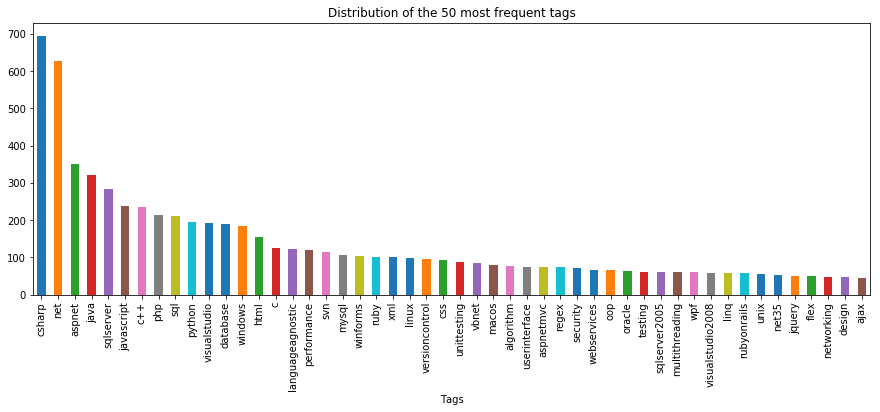

In [33]:
grouped['occurences'].plot(kind='bar',figsize=(15,5),title = "Distribution of the 50 most frequent tags")
for i in range(0,10):
    tag = grouped.index[i]
    print("The tag '%s' has the rank %s with %s occurences"%(tag,grouped.loc[tag,'rank'],grouped.loc[tag,'occurences']))
plt.show()

<p>
        **<font color='#D2691E'size="4">III.2) Tags filtering on accrued frequencies</font>**
</p>

In [34]:
#We are now going to focus our study on the Tags that generates 80% of all the messages :
grouped = group_by_frequency(df_tags,'Tags')
grouped = grouped[(grouped['percent_of_total']<=0.8) & (grouped['occurences']>=10)]
grouped.head()

,occurences,rank,cumsum,percent_of_total
Tags,,,,
csharp,695,1,695,0.043448
net,628,2,1323,0.082708
aspnet,351,3,1674,0.104651
java,320,4,1994,0.124656
sqlserver,284,5,2278,0.142411


In [35]:
L_frequent_tags = list(grouped.index) 
L_frequent_tags[0:10]

['csharp',
 'net',
 'aspnet',
 'java',
 'sqlserver',
 'javascript',
 'c++',
 'php',
 'sql',
 'python']

In [36]:
pickle.dump(L_frequent_tags,open(pickles_path+"L_frequent_tags.p", "wb"))

In [37]:
#And we now filter the 'tags_list' columns too : 
df['tag_list'] = df['tag_list'].apply(lambda x : list(set(x).intersection(set(L_frequent_tags))))
df.head()

,id,Text,tag_list
0,0,while applying opacity to a form should we use...,"[csharp, winforms]"
1,1,percentage width child element in absolutely p...,"[html, css, internetexplorer7]"
2,2,how do i calculate someone age in csharp given...,"[net, csharp, datetime]"
3,3,calculate relative time in csharp given a spec...,"[datetime, csharp]"
4,4,determine a user timezone is there any standar...,"[javascript, browser, html]"


<p>
        **<font color='#D2691E'size="4">IV) Tokenization</font>**
</p>

In [38]:
df['tokenized_text'] = df['Text'].apply(word_tokenize)
df.head()

,id,Text,tag_list,tokenized_text
0,0,while applying opacity to a form should we use...,"[csharp, winforms]","[while, applying, opacity, to, a, form, should..."
1,1,percentage width child element in absolutely p...,"[html, css, internetexplorer7]","[percentage, width, child, element, in, absolu..."
2,2,how do i calculate someone age in csharp given...,"[net, csharp, datetime]","[how, do, i, calculate, someone, age, in, csha..."
3,3,calculate relative time in csharp given a spec...,"[datetime, csharp]","[calculate, relative, time, in, csharp, given,..."
4,4,determine a user timezone is there any standar...,"[javascript, browser, html]","[determine, a, user, timezone, is, there, any,..."


In [39]:
#We calculate the initial length of each message, in terms of words and unique words
df['text_len'] = df['tokenized_text'].apply(lambda x : len(x))
df['unique_text_len'] = df['tokenized_text'].apply(lambda x : len(np.unique(x)))
df.head()

,id,Text,tag_list,tokenized_text,text_len,unique_text_len
0,0,while applying opacity to a form should we use...,"[csharp, winforms]","[while, applying, opacity, to, a, form, should...",75,52
1,1,percentage width child element in absolutely p...,"[html, css, internetexplorer7]","[percentage, width, child, element, in, absolu...",111,61
2,2,how do i calculate someone age in csharp given...,"[net, csharp, datetime]","[how, do, i, calculate, someone, age, in, csha...",23,16
3,3,calculate relative time in csharp given a spec...,"[datetime, csharp]","[calculate, relative, time, in, csharp, given,...",26,21
4,4,determine a user timezone is there any standar...,"[javascript, browser, html]","[determine, a, user, timezone, is, there, any,...",36,27


In [40]:
df_text_len = pd.DataFrame(columns = ['period','max_text_len','median_text_len','avg_text_len','min_text_len'])
df_unique_text_len = pd.DataFrame(columns = ['period','max_text_len','median_text_len','avg_text_len','min_text_len'])
PERIOD = 'init'
for col in ['text_len','unique_text_len']:
    max_ = np.max(df[col])
    median = np.median(df[col])
    average = np.average(df[col])
    min_ = np.min(df[col])
    
    dict_caracs = {'period':PERIOD,'max_text_len':max_,'median_text_len':median,'avg_text_len':average,'min_text_len':min_}
    if col == 'text_len':
        df_text_len = df_text_len.append(dict_caracs,ignore_index=True)
    if col == 'unique_text_len':
        df_unique_text_len = df_unique_text_len.append(dict_caracs,ignore_index=True)

In [41]:
df_text_len

,period,max_text_len,median_text_len,avg_text_len,min_text_len
0,init,1668,92.0,117.00362,8


In [42]:
df_unique_text_len

,period,max_text_len,median_text_len,avg_text_len,min_text_len
0,init,625,62.0,71.18914,5


Text(0.5,1,'initial messages distribution')

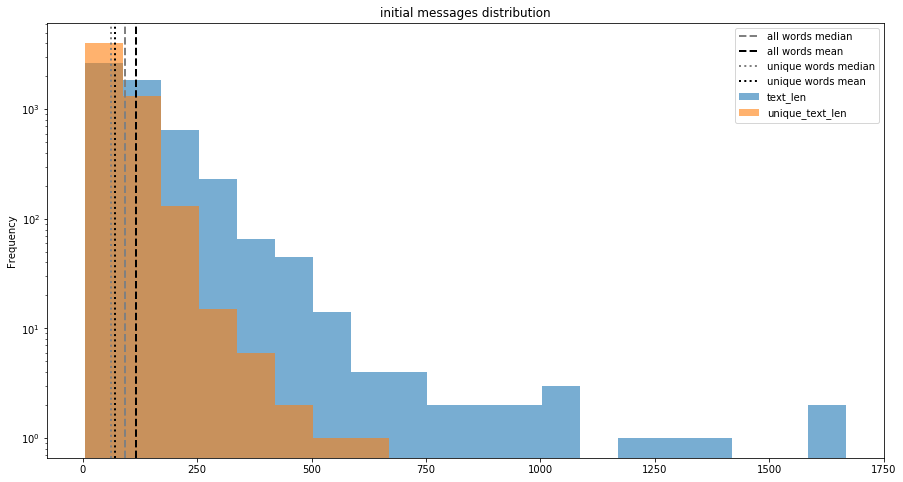

In [43]:
df[['text_len','unique_text_len']].plot.hist(bins=20,figsize=(15,8),alpha=0.6,logy=True)
plt.axvline(df['text_len'].median(), color='grey', linestyle='--',linewidth=2,label='all words median')
plt.axvline(df['text_len'].mean(), color='black', linestyle='--',linewidth=2,label='all words mean')
plt.axvline(df['unique_text_len'].median(), color='grey', linestyle=':',linewidth=2,label='unique words median')
plt.axvline(df['unique_text_len'].mean(), color='black', linestyle=':',linewidth=2,label='unique words mean')
plt.legend(loc='upper right')
plt.title("initial messages distribution")

<p>
        **<font color='#D2691E'size="4">V) Quality control before stopwords management and lemmatization</font>**
</p>

<p>
        **<font color='#D2691E'size="4">V.1) Quality control : All Tags vs all corpus</font>**
</p>

In [44]:
#We are here just interested by the 'tokenized_text' column, so we focus the analysis on this one :
L_all_words = []
start_time = time.time()

for sub_list in df['tokenized_text']:
    L_new_words = [word for word in np.unique(sub_list) if not word in L_all_words]
    L_all_words+=L_new_words

print("--- %s seconds ---" % (time.time() - start_time))
print("All the messages generate %s words"%len(L_all_words))

--- 13.916141033172607 seconds ---
All the messages generate 34548 words


In [45]:
#We now want to create a list of all the words contained in tags :

In [46]:
#And we can now compute the ratio of tags words presents in the 'Tags' list and absent in the messages:
set_matching_tags = set(L_frequent_tags).intersection(L_all_words)
MATCHING_TAGS = len(set_matching_tags)
NUMBER_OF_TAGS = len(L_frequent_tags)
quality_matching = 100*(MATCHING_TAGS/NUMBER_OF_TAGS)
print("%.2f %s of tags words are both in the tags list and in the corpus of messages :"%(quality_matching,'%'))

86.04 % of tags words are both in the tags list and in the corpus of messages :


In [47]:
#What are the tag words mismatching  ?
L_init_mismatching_tags = [w for w in L_frequent_tags if not w in set_matching_tags]
print("%i tags mismatch"%len(L_init_mismatching_tags))
L_init_mismatching_tags

37 tags mismatch


['userinterface',
 'sqlserver2005',
 'visualstudio2008',
 'net35',
 'webapplications',
 'designpatterns',
 'actionscript3',
 'net20',
 'reportingservices',
 'buildprocess',
 'functionalprogramming',
 'databasedesign',
 'windowsmobile',
 'internetexplorer',
 'aspclassic',
 'buildautomation',
 'visualc++',
 'windowsvista',
 'aspnetajax',
 'compactframework',
 'codingstyle',
 'compilerconstruction',
 'internetexplorer6',
 'fileio',
 'ios',
 'fulltextsearch',
 'javaee',
 'googlechrome',
 'activedirectory',
 'continuousintegration',
 'projectmanagement',
 'crystalreports',
 'memoryleaks',
 'msoffice',
 'filesystems',
 'windowsinstaller',
 'internetexplorer7']

<p>
        **<font color='#D2691E'size="4">V.2) Quality control : 1 Tag vs 1 message</font>**
</p>

In [48]:
#We now need to see how the messages contain the informations of their tags 
#We are going to calculate a percent of tags both contained in the 'tag_list' cand 'tokenized_text''s one : 

In [49]:
#We first calculate the length of the 'Tags' column : 
df['n_tags'] = df['tag_list'].apply(len)
df = df[df['n_tags']>0]
df.head()

,id,Text,tag_list,tokenized_text,text_len,unique_text_len,n_tags
0,0,while applying opacity to a form should we use...,"[csharp, winforms]","[while, applying, opacity, to, a, form, should...",75,52,2
1,1,percentage width child element in absolutely p...,"[html, css, internetexplorer7]","[percentage, width, child, element, in, absolu...",111,61,3
2,2,how do i calculate someone age in csharp given...,"[net, csharp, datetime]","[how, do, i, calculate, someone, age, in, csha...",23,16,3
3,3,calculate relative time in csharp given a spec...,"[datetime, csharp]","[calculate, relative, time, in, csharp, given,...",26,21,2
4,4,determine a user timezone is there any standar...,"[javascript, browser, html]","[determine, a, user, timezone, is, there, any,...",36,27,3


In [50]:
#We then the intersection beween the 'tag_list' and the 'tokenized_text' columns of lists :
df['tags_matching'] = df.apply(lambda x : set(x['tag_list']).intersection(set(x['tokenized_text'])),axis=1)
df.head()

,id,Text,tag_list,tokenized_text,text_len,unique_text_len,n_tags,tags_matching
0,0,while applying opacity to a form should we use...,"[csharp, winforms]","[while, applying, opacity, to, a, form, should...",75,52,2,{}
1,1,percentage width child element in absolutely p...,"[html, css, internetexplorer7]","[percentage, width, child, element, in, absolu...",111,61,3,{css}
2,2,how do i calculate someone age in csharp given...,"[net, csharp, datetime]","[how, do, i, calculate, someone, age, in, csha...",23,16,3,"{datetime, csharp}"
3,3,calculate relative time in csharp given a spec...,"[datetime, csharp]","[calculate, relative, time, in, csharp, given,...",26,21,2,"{datetime, csharp}"
4,4,determine a user timezone is there any standar...,"[javascript, browser, html]","[determine, a, user, timezone, is, there, any,...",36,27,3,{}


In [51]:
#We compute the number of original tags matching
df['n_tags_matching'] = df['tags_matching'].apply(lambda x : len(x))
#Now we can assign a score for each (tag_list/Text) couple :
df['matching_score'] = df['n_tags_matching']/df['n_tags']
df.head()

,id,Text,tag_list,tokenized_text,text_len,unique_text_len,n_tags,tags_matching,n_tags_matching,matching_score
0,0,while applying opacity to a form should we use...,"[csharp, winforms]","[while, applying, opacity, to, a, form, should...",75,52,2,{},0,0.000000
1,1,percentage width child element in absolutely p...,"[html, css, internetexplorer7]","[percentage, width, child, element, in, absolu...",111,61,3,{css},1,0.333333
2,2,how do i calculate someone age in csharp given...,"[net, csharp, datetime]","[how, do, i, calculate, someone, age, in, csha...",23,16,3,"{datetime, csharp}",2,0.666667
3,3,calculate relative time in csharp given a spec...,"[datetime, csharp]","[calculate, relative, time, in, csharp, given,...",26,21,2,"{datetime, csharp}",2,1.000000
4,4,determine a user timezone is there any standar...,"[javascript, browser, html]","[determine, a, user, timezone, is, there, any,...",36,27,3,{},0,0.000000


In [52]:
df[['n_tags_matching']].head()

,n_tags_matching
0,0
1,1
2,2
3,2
4,0


In [53]:
#The (tag_list/Text)couples tha't have a matching score of 0 are not interresting for us because our goal is to
# predict tags.
#we can finally select all the posts that have a score of 1 :
perfect_couples = df[df['matching_score']==1].index
INITIAL_QUALITY_RATIO = 100*(len(perfect_couples)/len(df))
print("%s messages of the %s (%.2f %s) exactly contains the information of their tags"%\
      (len(perfect_couples),len(df),INITIAL_QUALITY_RATIO,'%'))

1707 messages of the 5252 (32.50 %) exactly contains the information of their tags


In [54]:
INITIAL_AVERAGE_ACCURACY = np.mean(df['matching_score'])
INITIAL_MEDIAN_ACCURACY = np.median(df['matching_score'])
print("The initial average accuracy of the (tag_list/Text) couple is : %s"%INITIAL_AVERAGE_ACCURACY)
print("The initial median accuracy of the (tag_list/Text) couple is : %s"%INITIAL_MEDIAN_ACCURACY)

The initial average accuracy of the (tag_list/Text) couple is : 0.5332984259964457
The initial median accuracy of the (tag_list/Text) couple is : 0.5


Text(0.5,1,'initial matching score distribution')

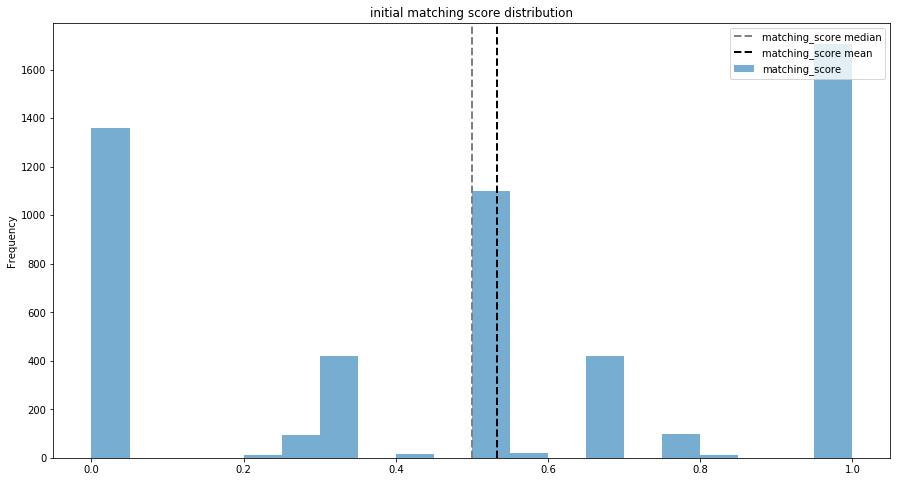

In [55]:
df[['matching_score']].plot.hist(bins=20,figsize=(15,8),alpha=0.6,logy=False)
plt.axvline(INITIAL_MEDIAN_ACCURACY, color='grey', linestyle='--',linewidth=2,label='matching_score median')
plt.axvline(INITIAL_AVERAGE_ACCURACY, color='black', linestyle='--',linewidth=2,label='matching_score mean')
plt.legend(loc='upper right')
plt.title("initial matching score distribution")

<p>
        **<font color='#D2691E'size="4">VI) Stopwords processing</font>**
</p>

In [56]:
english_stopwords  = stopwords.words("english")
print(english_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [57]:
tokenized_text = list(df['tokenized_text'])

In [58]:
#We specify the excution params for  the python script responsible for the multiprocessing : 
execution_params = {'N_PROCS' : 8,
                    'stopwords':english_stopwords,
                    'tokenized_text':tokenized_text}
#We dump our execution params :
pickle.dump(execution_params,open(temp_files_path+"execution_params.p", "wb"))
#And we run the script responsible for the stopwords elimination on different process :  
%run -i multiprocessing_stopwords.py

Multiprocessing
Creating pool with 8 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 3.0747244358062744 seconds ---
the result file is available at : 
 temp_files_path+"tokenized_text_without_stopwords.p"


In [59]:
#Now we can load the result of the multiprocessing task : 
tokenized_text_without_stopwords = pickle.load(open(temp_files_path+"tokenized_text_without_stopwords.p", "rb" ))
#And we assign the result of the multiprocessing :
df['tokenized_text'] = tokenized_text_without_stopwords
df.head()

,id,Text,tag_list,tokenized_text,text_len,unique_text_len,n_tags,tags_matching,n_tags_matching,matching_score
0,0,while applying opacity to a form should we use...,"[csharp, winforms]","[applying, opacity, form, use, decimal, double...",75,52,2,{},0,0.000000
1,1,percentage width child element in absolutely p...,"[html, css, internetexplorer7]","[percentage, width, child, element, absolutely...",111,61,3,{css},1,0.333333
2,2,how do i calculate someone age in csharp given...,"[net, csharp, datetime]","[calculate, someone, age, csharp, given, datet...",23,16,3,"{datetime, csharp}",2,0.666667
3,3,calculate relative time in csharp given a spec...,"[datetime, csharp]","[calculate, relative, time, csharp, given, spe...",26,21,2,"{datetime, csharp}",2,1.000000
4,4,determine a user timezone is there any standar...,"[javascript, browser, html]","[determine, user, timezone, standard, way, web...",36,27,3,{},0,0.000000


In [60]:
#And we can clean the temp files dir :
import os
from functions import class_my_files
dict_extensions = class_my_files(temp_files_path)
pickles_temp_files  = dict_extensions['p']
for file_name in pickles_temp_files:
    os.remove(temp_files_path+file_name)

In [61]:
df['text_len'] = df['tokenized_text'].apply(lambda x : len(x))
df['unique_text_len'] = df['tokenized_text'].apply(lambda x : len(np.unique(x)))
df.head()

,id,Text,tag_list,tokenized_text,text_len,unique_text_len,n_tags,tags_matching,n_tags_matching,matching_score
0,0,while applying opacity to a form should we use...,"[csharp, winforms]","[applying, opacity, form, use, decimal, double...",43,33,2,{},0,0.000000
1,1,percentage width child element in absolutely p...,"[html, css, internetexplorer7]","[percentage, width, child, element, absolutely...",62,39,3,{css},1,0.333333
2,2,how do i calculate someone age in csharp given...,"[net, csharp, datetime]","[calculate, someone, age, csharp, given, datet...",12,10,3,"{datetime, csharp}",2,0.666667
3,3,calculate relative time in csharp given a spec...,"[datetime, csharp]","[calculate, relative, time, csharp, given, spe...",20,16,2,"{datetime, csharp}",2,1.000000
4,4,determine a user timezone is there any standar...,"[javascript, browser, html]","[determine, user, timezone, standard, way, web...",20,16,3,{},0,0.000000


In [62]:
PERIOD = 'clean_stopwords'
for col in ['text_len','unique_text_len']:
    max_ = np.max(df[col])
    median = np.median(df[col])
    average = np.average(df[col])
    min_ = np.min(df[col])
    
    dict_caracs = {'period':PERIOD,'max_text_len':max_,'median_text_len':median,'avg_text_len':average,'min_text_len':min_}
    if col == 'text_len':
        df_text_len = df_text_len.append(dict_caracs,ignore_index=True)
    if col == 'unique_text_len':
        df_unique_text_len = df_unique_text_len.append(dict_caracs,ignore_index=True)

Text(0.5,1,'messages distribution after the stopwords cleaning')

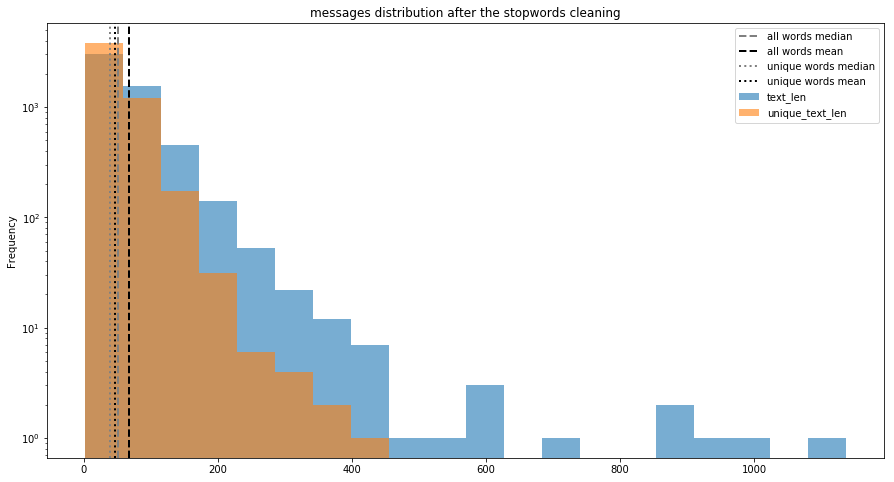

In [63]:
df[['text_len','unique_text_len']].plot.hist(bins=20,figsize=(15,8),alpha=0.6,logy=True)
plt.axvline(df['text_len'].median(), color='grey', linestyle='--',linewidth=2,label='all words median')
plt.axvline(df['text_len'].mean(), color='black', linestyle='--',linewidth=2,label='all words mean')
plt.axvline(df['unique_text_len'].median(), color='grey', linestyle=':',linewidth=2,label='unique words median')
plt.axvline(df['unique_text_len'].mean(), color='black', linestyle=':',linewidth=2,label='unique words mean')
plt.legend(loc='upper right')
plt.title("messages distribution after the stopwords cleaning")

<p>
        **<font color='#D2691E'size="4">VII) Lemmatization</font>**
</p>

In [64]:
lemmatizer = WordNetLemmatizer()

In [65]:
def smart_lemmatize(myList,myStopwordsList):
    """
    This function goal is to lemmatize the words contained in a list ('myList' arg)
    
    RESULT : a list of lemmatized words
    see more at :
    https://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization
    https://www.nltk.org/book/ch05.html
    https://www.kaggle.com/c/word2vec-nlp-tutorial#part-1-for-beginners-bag-of-words
    
    PARAMS :
    - 'myList' : the entry list of words
    - 'myStopwordsList' : The stopwords list you want to use if you don't want to lemmatize some words
    
    EXAMPLE :
    smart_lemmatize(['are','a','king','of','snakes','which','comes','from','the','thieves','countries'])
    >>>>>>>>>>>>>>> ['be','a','king','of','snake','which','come','from','the','thief','country']
    """    
    from nltk import pos_tag
    from nltk.stem import WordNetLemmatizer
    
    lemmatized_list = []
    #We use 'pos_tag' ("part of speech tag) in order to regognize the grammatical essence of each word : 
    grammatical_essence_list = pos_tag(myList,tagset='universal')
    #We create a dict in order to map the results of the args which comes from the 'pos_tag' processing 
    dict_pos_tag_mapping = {'ADJ':'a','ADJ_SAT':'s','ADV':'r','NOUN':'n','VERB':'v'}
    smart_lemmatizer = WordNetLemmatizer()
    
    #And we associate a smart lemme to each word contained in our list :
    for tuple_ in grammatical_essence_list :
        word = tuple_[0]
        raw_essence = tuple_[1]
        if raw_essence in dict_pos_tag_mapping.keys():
            essence = dict_pos_tag_mapping[raw_essence]
        else:
            essence = 'n'
        if not word in myStopwordsList:
            lemme = smart_lemmatizer.lemmatize(word,essence)
            lemmatized_list.append(lemme)
        else:
            lemmatized_list.append(word)
    
    return lemmatized_list

In [66]:
def lemmatize_list_of_list(myListOfList,myLemmatizeFunction,myStopwordsList):
    for index in range(len(myListOfList)):
        target_list = myListOfList[index]
        myListOfList[index] = smart_lemmatize(target_list,myStopwordsList)
    return myListOfList

In [67]:
tokenized_text = list(df['tokenized_text'])

In [68]:
#We specify the excution params for  the python script responsible for the multiprocessing : 
execution_params = {'N_PROCS' : 8,
                    'tokenized_text':tokenized_text,
                    'stopwords':L_frequent_tags+L_words_of_tags}
#We dump our execution params :
pickle.dump(execution_params,open(temp_files_path+"execution_params.p", "wb"))
#And we run the script responsible for the stopwords elimination on different process :  
%run -i multiprocessing_lemmatize.py

Multiprocessing
Creating pool with 8 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 12.63234257698059 seconds ---
the result file is available at : 
 temp_files_path+"tokenized_text_lemmatized.p"


In [69]:
#Now we can load the result of the multiprocessing task : 
tokenized_text_lemmatized = pickle.load(open(temp_files_path+"tokenized_text_lemmatized.p", "rb" ))

In [70]:
df['tokenized_text'] = tokenized_text_lemmatized

In [71]:
df['text_len'] = df['tokenized_text'].apply(lambda x : len(x))
df['unique_text_len'] = df['tokenized_text'].apply(lambda x : len(np.unique(x)))
df.head()

,id,Text,tag_list,tokenized_text,text_len,unique_text_len,n_tags,tags_matching,n_tags_matching,matching_score
0,0,while applying opacity to a form should we use...,"[csharp, winforms]","[apply, opacity, form, use, decimal, double, v...",43,32,2,{},0,0.000000
1,1,percentage width child element in absolutely p...,"[html, css, internetexplorer7]","[percentage, width, child, element, absolutely...",62,39,3,{css},1,0.333333
2,2,how do i calculate someone age in csharp given...,"[net, csharp, datetime]","[calculate, someone, age, csharp, give, dateti...",12,10,3,"{datetime, csharp}",2,0.666667
3,3,calculate relative time in csharp given a spec...,"[datetime, csharp]","[calculate, relative, time, csharp, give, spec...",20,16,2,"{datetime, csharp}",2,1.000000
4,4,determine a user timezone is there any standar...,"[javascript, browser, html]","[determine, user, timezone, standard, way, web...",20,16,3,{},0,0.000000


In [72]:
PERIOD = 'lemmatization'
for col in ['text_len','unique_text_len']:
    max_ = np.max(df[col])
    median = np.median(df[col])
    average = np.average(df[col])
    min_ = np.min(df[col])
    
    dict_caracs = {'period':PERIOD,'max_text_len':max_,'median_text_len':median,'avg_text_len':average,'min_text_len':min_}
    if col == 'text_len':
        df_text_len = df_text_len.append(dict_caracs,ignore_index=True)
    if col == 'unique_text_len':
        df_unique_text_len = df_unique_text_len.append(dict_caracs,ignore_index=True)

Text(0.5,1,'messages distribution after the lemmatization')

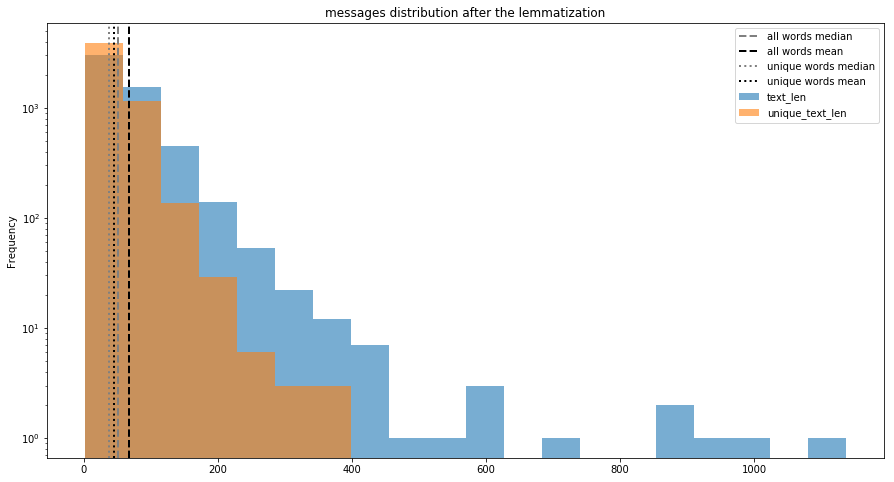

In [73]:
df[['text_len','unique_text_len']].plot.hist(bins=20,figsize=(15,8),alpha=0.6,logy=True)
plt.axvline(df['text_len'].median(), color='grey', linestyle='--',linewidth=2,label='all words median')
plt.axvline(df['text_len'].mean(), color='black', linestyle='--',linewidth=2,label='all words mean')
plt.axvline(df['unique_text_len'].median(), color='grey', linestyle=':',linewidth=2,label='unique words median')
plt.axvline(df['unique_text_len'].mean(), color='black', linestyle=':',linewidth=2,label='unique words mean')
plt.legend(loc='upper right')
plt.title("messages distribution after the lemmatization")

<p>
        **<font color='#D2691E'size="4">VIII) Corpus stopwords management</font>**
</p>

<p>
        **<font color='#D2691E'size="4">VIII.1) Words frequencies analysis</font>**
</p>

In [74]:
L_corpus = []
for text in df['tokenized_text']:
    L_corpus+=text

In [75]:
from collections import Counter
counter = Counter(L_corpus)
counter = counter.most_common()

In [76]:
df_all_words = pd.DataFrame(counter,columns=['word','count'])
df_all_words.index = df_all_words['word']
df_all_words.head()

,word,count
word,,
&,&,7431
gt,gt,3112
use,use,2967
im,im,2673
using,using,2399


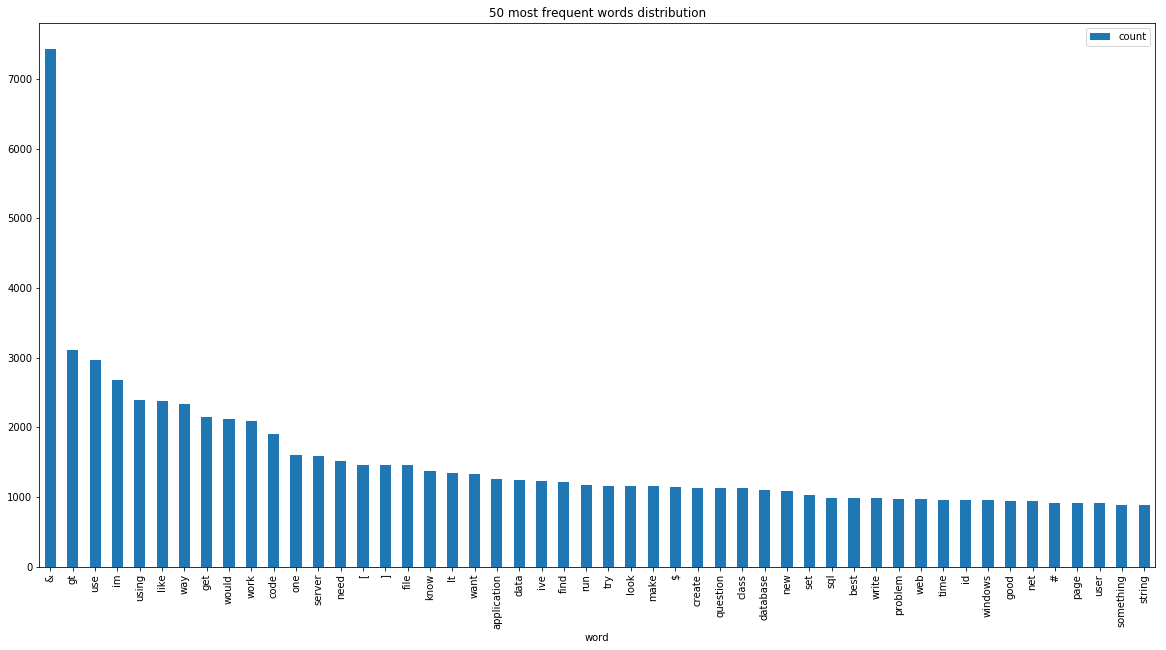

In [77]:
df_all_words[['count']].head(50).plot(kind='bar',
                                       stacked=True,
                                       title="50 most frequent words distribution",
                                       figsize=(20,10))

In [78]:
L_tag_parts = list(np.unique(L_frequent_tags+L_words_of_tags))

In [79]:
#We can now access to all the most frequent words that are not in our tags :
~df_all_words['word'].isin(L_tag_parts)

word
&                                  True
gt                                 True
use                               False
im                                 True
using                             False
like                              False
way                                True
get                               False
would                              True
work                               True
code                              False
one                                True
server                            False
need                               True
[                                  True
]                                  True
file                              False
know                               True
lt                                 True
want                               True
application                       False
data                              False
ive                                True
find                               True
run                                

In [80]:
df_all_words = df_all_words[~df_all_words['word'].isin(L_tag_parts)]
df_all_words['rank'] = range(1,len(df_all_words)+1)
df_all_words.head()

,word,count,rank
word,,,
&,&,7431,1
gt,gt,3112,2
im,im,2673,3
way,way,2329,4
would,would,2122,5


In [81]:
df_all_words[df_all_words['rank']<100]

,word,count,rank
word,,,
&,&,7431,1
gt,gt,3112,2
im,im,2673,3
way,way,2329,4
would,would,2122,5
work,work,2094,6
one,one,1609,7
need,need,1519,8
[,[,1465,9


In [82]:
#We are going to eliminate the rarest and the most frequent words
#A major part of the words are rare
quantiles = df_all_words['count'].quantile(q=[0.1,0.5,0.90])
quantiles = quantiles.to_dict()
quantiles

{0.1: 1.0, 0.5: 1.0, 0.9: 6.0}

In [83]:
#MRarest words are the words that have the most occurences than the 9th decile :
L_rarest_words = list(df_all_words['word'][df_all_words['count']<=int(quantiles[0.9])])

In [84]:
#Now the rarest words disappeared, we can analyze the quantiles distribution without them :
df_all_words = df_all_words[df_all_words['count']>10]
df_all_words.head()

,word,count,rank
word,,,
&,&,7431,1
gt,gt,3112,2
im,im,2673,3
way,way,2329,4
would,would,2122,5


In [85]:
quantiles = df_all_words['count'].quantile(q=[0.1,0.5,0.9])
quantiles = quantiles.to_dict()
quantiles

{0.1: 12.0, 0.5: 26.0, 0.9: 170.0}

In [86]:
#Most frequent words are the words that have the most occurences than the 9th decile without the rarest words
L_most_frequent_words = list(df_all_words['word'][df_all_words['count']>= int(quantiles[0.9])])

In [87]:
#The corpus stopwords is constitued by the rarest and the most frequent words : 
corpus_stopwords = L_rarest_words+L_most_frequent_words

In [88]:
stopwords_len = len(corpus_stopwords)
rarest_words_len = len(L_rarest_words)
rarest_words_ratio = 100*(rarest_words_len/stopwords_len)
frequent_words_len = len(L_most_frequent_words)
frequent_words_ratio = 100-rarest_words_ratio

print("Number of stopwords in the corpus : %s \n%.2f percent provides from the rarest words (%s)\nthe other %.2f percent provides from the most frequent words (%s)"%\
      (stopwords_len,rarest_words_ratio,rarest_words_len,frequent_words_ratio,frequent_words_len))

Number of stopwords in the corpus : 25844 
99.26 percent provides from the rarest words (25654)
the other 0.74 percent provides from the most frequent words (190)


<p>
        **<font color='#D2691E'size="4">VIII.2) Dumping the list of the corpus stopwords</font>**
</p>

In [89]:
pickle.dump(corpus_stopwords,open(pickles_path+"corpus_stopwords.p", "wb"))

<p>
        **<font color='#D2691E'size="4">VIII.3) Corpus stopwords filtering</font>**
</p>

In [90]:
tokenized_text = list(df['tokenized_text'])

In [91]:
#We want to filter the tokenized_text on the most frequent words we selected :
#We specify the excution params for  the python script responsible for the multiprocessing : 
execution_params = {'N_PROCS' : 8,
                    'stopwords':corpus_stopwords,
                    'tokenized_text':tokenized_text}
#We dump our execution params :
pickle.dump(execution_params,open(temp_files_path+"execution_params.p", "wb"))
#And we run the script responsible for the stopwords elimination on different process :  
%run -i multiprocessing_stopwords.py


#We load the result of the multiprocessing task : 
tokenized_text_without_stopwords = pickle.load(open(temp_files_path+"tokenized_text_without_stopwords.p", "rb" ))
#And we assign the result of the multiprocessing :
df['tokenized_text'] = tokenized_text_without_stopwords


#We clean the temp files dir :
import os
from functions import class_my_files
dict_extensions = class_my_files(temp_files_path)
pickles_temp_files  = dict_extensions['p']
for file_name in pickles_temp_files:
    os.remove(temp_files_path+file_name)

df.head()

Multiprocessing
Creating pool with 8 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 262.31604623794556 seconds ---
the result file is available at : 
 temp_files_path+"tokenized_text_without_stopwords.p"


,id,Text,tag_list,tokenized_text,text_len,unique_text_len,n_tags,tags_matching,n_tags_matching,matching_score
0,0,while applying opacity to a form should we use...,"[csharp, winforms]","[apply, opacity, form, use, decimal, double, v...",43,32,2,{},0,0.000000
1,1,percentage width child element in absolutely p...,"[html, css, internetexplorer7]","[percentage, width, child, element, absolutely...",62,39,3,{css},1,0.333333
2,2,how do i calculate someone age in csharp given...,"[net, csharp, datetime]","[calculate, age, csharp, datetime, represent, ...",12,10,3,"{datetime, csharp}",2,0.666667
3,3,calculate relative time in csharp given a spec...,"[datetime, csharp]","[calculate, relative, time, csharp, datetime, ...",20,16,2,"{datetime, csharp}",2,1.000000
4,4,determine a user timezone is there any standar...,"[javascript, browser, html]","[determine, user, timezone, web, server, deter...",20,16,3,{},0,0.000000


In [92]:
df['text_len'] = df['tokenized_text'].apply(lambda x : len(x))
df['unique_text_len'] = df['tokenized_text'].apply(lambda x : len(np.unique(x)))
df.head()

,id,Text,tag_list,tokenized_text,text_len,unique_text_len,n_tags,tags_matching,n_tags_matching,matching_score
0,0,while applying opacity to a form should we use...,"[csharp, winforms]","[apply, opacity, form, use, decimal, double, v...",29,21,2,{},0,0.000000
1,1,percentage width child element in absolutely p...,"[html, css, internetexplorer7]","[percentage, width, child, element, absolutely...",44,23,3,{css},1,0.333333
2,2,how do i calculate someone age in csharp given...,"[net, csharp, datetime]","[calculate, age, csharp, datetime, represent, ...",9,7,3,"{datetime, csharp}",2,0.666667
3,3,calculate relative time in csharp given a spec...,"[datetime, csharp]","[calculate, relative, time, csharp, datetime, ...",16,12,2,"{datetime, csharp}",2,1.000000
4,4,determine a user timezone is there any standar...,"[javascript, browser, html]","[determine, user, timezone, web, server, deter...",14,10,3,{},0,0.000000


In [93]:
PERIOD = 'clean_frequent_words'
for col in ['text_len','unique_text_len']:
    max_ = np.max(df[col])
    median = np.median(df[col])
    average = np.average(df[col])
    min_ = np.min(df[col])
    
    dict_caracs = {'period':PERIOD,'max_text_len':max_,'median_text_len':median,'avg_text_len':average,'min_text_len':min_}
    if col == 'text_len':
        df_text_len = df_text_len.append(dict_caracs,ignore_index=True)
    if col == 'unique_text_len':
        df_unique_text_len = df_unique_text_len.append(dict_caracs,ignore_index=True)

Text(0.5,1,'messages distribution after the most frequent words cleaning')

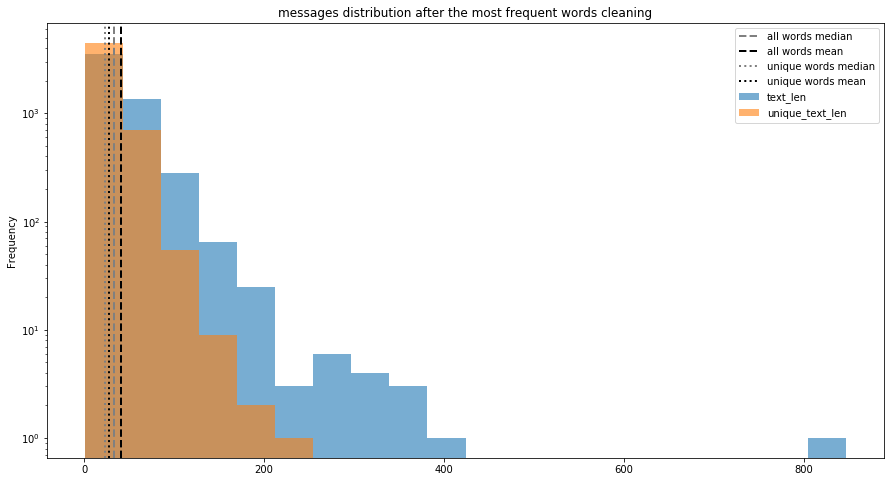

In [94]:
df[['text_len','unique_text_len']].plot.hist(bins=20,figsize=(15,8),alpha=0.6,logy=True)
plt.axvline(df['text_len'].median(), color='grey', linestyle='--',linewidth=2,label='all words median')
plt.axvline(df['text_len'].mean(), color='black', linestyle='--',linewidth=2,label='all words mean')
plt.axvline(df['unique_text_len'].median(), color='grey', linestyle=':',linewidth=2,label='unique words median')
plt.axvline(df['unique_text_len'].mean(), color='black', linestyle=':',linewidth=2,label='unique words mean')
plt.legend(loc='upper right')
plt.title("messages distribution after the most frequent words cleaning")

<p>
        **<font color='#D2691E'size="4">IX) Cleaning Summary</font>**
</p>

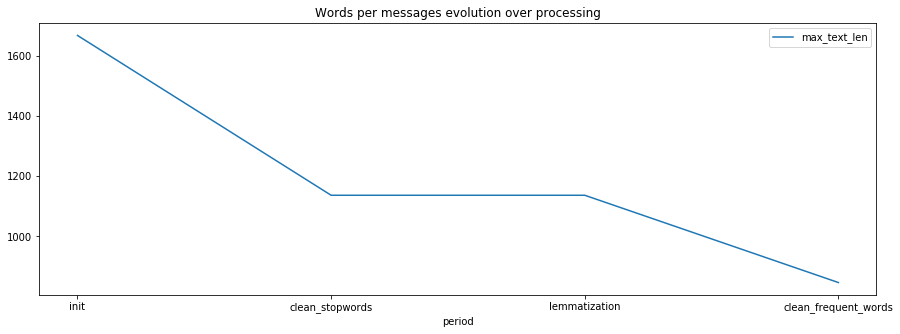

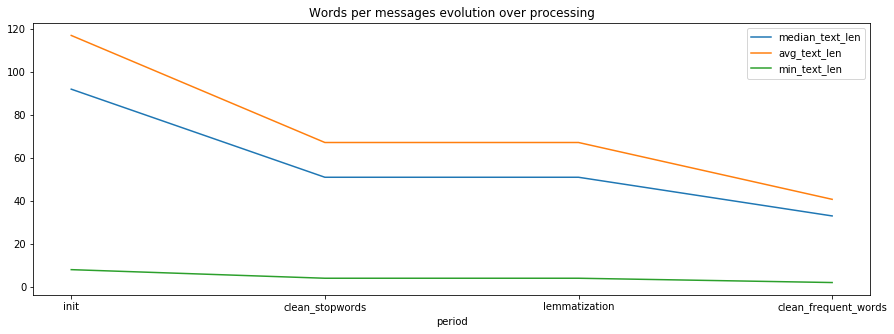

In [95]:
evol_text_len = df_text_len.copy()
evol_text_len.index = evol_text_len['period']
for col in ['max_text_len','median_text_len','avg_text_len','min_text_len']:
    new_col_name = re.sub('_text_len','',col)
    if col == 'max_text_len':
        evol_text_len[col].plot(figsize=(15,5),title= "Words per messages evolution over processing",
                                xticks=range(len(evol_text_len.index)))
        plt.legend()
        plt.show()
    else:
        evol_text_len[col].plot(figsize=(15,5),title= "Words per messages evolution over processing",
                                xticks=range(len(evol_text_len.index)))
        plt.legend()
        
#After all our steps, the average and median text length (all words included) are divided by two : 

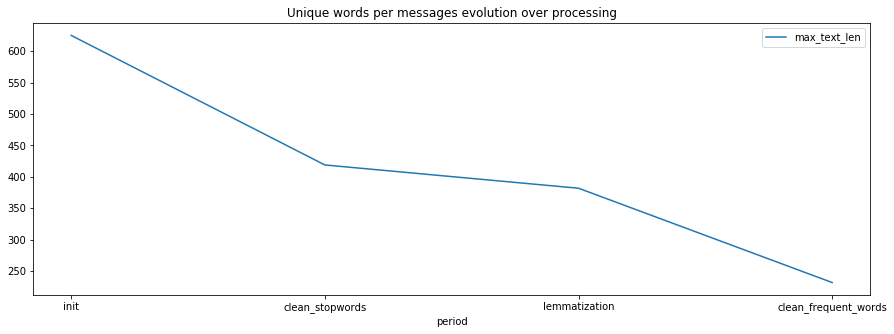

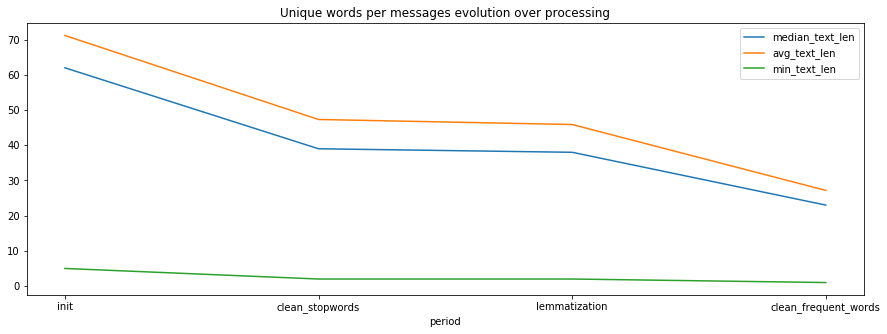

In [96]:
evol_text_len = df_unique_text_len.copy()
evol_text_len.index = evol_text_len['period']
for col in ['max_text_len','median_text_len','avg_text_len','min_text_len']:
    new_col_name = re.sub('_text_len','',col)
    if col == 'max_text_len':
        evol_text_len[col].plot(figsize=(15,5),title= "Unique words per messages evolution over processing",
                                xticks=range(len(evol_text_len.index)))
        plt.legend()
        plt.show()
    else:
        evol_text_len[col].plot(figsize=(15,5),title= "Unique words per messages evolution over processing",
                                xticks=range(len(evol_text_len.index)))
        plt.legend()

#The average and median text length, in terms of unique words, are also almost divided by two : 

<p>
        **<font color='#D2691E'size="4">X) Quality control post-processing</font>**
</p>

<p>
        **<font color='#D2691E'size="4">X.1) Quality control post-processing : All Tags vs all corpus</font>**
</p>

In [97]:
L_all_words = []
for sub_list in df['tokenized_text']:
    L_new_words = [word for word in np.unique(sub_list) if not word in L_all_words]
    L_all_words+=L_new_words

#We compute the ratio of tags words presents in the 'Tags' list and absent in the messages:
set_matching_tags = set(L_frequent_tags).intersection(L_all_words)
MATCHING_TAGS = len(set_matching_tags)
NUMBER_OF_TAGS = len(L_frequent_tags)
quality_matching = 100*(MATCHING_TAGS/NUMBER_OF_TAGS)
print("%.2f %s of tags words are both in the tags list and in the corpus of messages :"%(quality_matching,'%'))

#What are the tag words mismatching  ?
L_final_mismatching_tags = [w for w in L_frequent_tags if not w in set_matching_tags]

print("Now we have %s tags words which are not in the corpus"%len(L_final_mismatching_tags))

L_appeared = [w for w in L_init_mismatching_tags if not w in L_final_mismatching_tags]
L_disappeared = [w for w in L_final_mismatching_tags if not w in L_init_mismatching_tags]
print("Tags words which appeared in the corpus : %s \nTags words which disappeared in the corpus : %s"%(L_appeared,L_disappeared))

85.66 % of tags words are both in the tags list and in the corpus of messages :
Now we have 38 tags words which are not in the corpus
Tags words which appeared in the corpus : [] 
Tags words which disappeared in the corpus : ['errorhandling']


<p>
        **<font color='#D2691E'size="4">X.2) Quality control post-processing : 1 Tag vs 1 message</font>**
</p>

In [98]:
#We calculate the intersection beween the 'tag_list' and the 'tokenized_text' columns of lists :
df['final_tags_matching'] = df.apply(lambda x : set(x['tag_list']).intersection(set(x['tokenized_text'])),axis=1)
df['n_tags_matching_fin'] = df['final_tags_matching'].apply(lambda x : len(list(x)))

#We assign a score for each (tag_list/Text) couple :
df['final_matching_score'] = df['n_tags_matching_fin']/df['n_tags']
df.head()

,id,Text,tag_list,tokenized_text,text_len,unique_text_len,n_tags,tags_matching,n_tags_matching,matching_score,final_tags_matching,n_tags_matching_fin,final_matching_score
0,0,while applying opacity to a form should we use...,"[csharp, winforms]","[apply, opacity, form, use, decimal, double, v...",29,21,2,{},0,0.000000,{},0,0.000000
1,1,percentage width child element in absolutely p...,"[html, css, internetexplorer7]","[percentage, width, child, element, absolutely...",44,23,3,{css},1,0.333333,{css},1,0.333333
2,2,how do i calculate someone age in csharp given...,"[net, csharp, datetime]","[calculate, age, csharp, datetime, represent, ...",9,7,3,"{datetime, csharp}",2,0.666667,"{datetime, csharp}",2,0.666667
3,3,calculate relative time in csharp given a spec...,"[datetime, csharp]","[calculate, relative, time, csharp, datetime, ...",16,12,2,"{datetime, csharp}",2,1.000000,"{datetime, csharp}",2,1.000000
4,4,determine a user timezone is there any standar...,"[javascript, browser, html]","[determine, user, timezone, web, server, deter...",14,10,3,{},0,0.000000,{},0,0.000000


In [99]:
#The (tag_list/Text)couples tha't have a matching score of 0 are not interresting for us because our goal is to
# predict tags.
perfect_couples = df[df['final_matching_score']==1].index
FINAL_QUALITY_RATIO = 100*(len(perfect_couples)/len(df))
print("%s messages of the %s (%.2f %s) exactly contains the information of their tags"%\
      (len(perfect_couples),len(df),INITIAL_QUALITY_RATIO,'%'))

1726 messages of the 5252 (32.50 %) exactly contains the information of their tags


In [100]:
FINAL_AVERAGE_ACCURACY = np.mean(df['final_matching_score'])
FINAL_MEDIAN_ACCURACY = np.median(df['final_matching_score'])
print("The final average accuracy of the (tag_list/Text) couple is : %s"%FINAL_AVERAGE_ACCURACY)
print("The final median accuracy of the (tag_list/Text) couple is : %s"%FINAL_MEDIAN_ACCURACY)
print()

#The final  median and average accuracies are very close to their original values, so our cleaning didn't altered the data :
AVERAGE_ACCURACY_CHANGE = 100*(FINAL_AVERAGE_ACCURACY-INITIAL_AVERAGE_ACCURACY)/INITIAL_AVERAGE_ACCURACY
MEDIAN_ACCURACY_GANGE = 100*(FINAL_MEDIAN_ACCURACY-INITIAL_MEDIAN_ACCURACY)/INITIAL_MEDIAN_ACCURACY
print("After the data processing : \n the average accuracy changed by %s%s\n the median accuracy changed by %s%s"\
      %(AVERAGE_ACCURACY_CHANGE,'%',MEDIAN_ACCURACY_GANGE,'%'))

The final average accuracy of the (tag_list/Text) couple is : 0.5373445036811373
The final median accuracy of the (tag_list/Text) couple is : 0.5

After the data processing : 
 the average accuracy changed by 0.7586892230427338%
 the median accuracy changed by 0.0%


Text(0.5,1,'final matching score distribution')

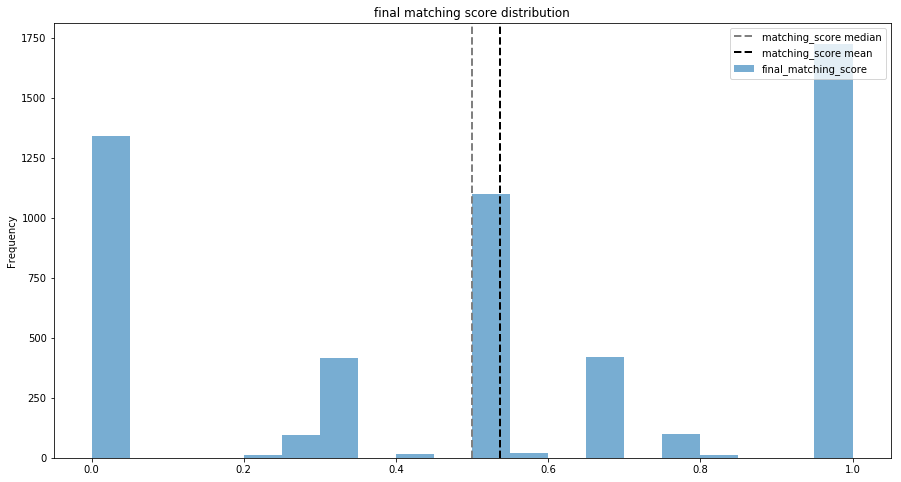

In [101]:
df[['final_matching_score']].plot.hist(bins=20,figsize=(15,8),alpha=0.6,logy=False)
plt.axvline(FINAL_MEDIAN_ACCURACY, color='grey', linestyle='--',linewidth=2,label='matching_score median')
plt.axvline(FINAL_AVERAGE_ACCURACY, color='black', linestyle='--',linewidth=2,label='matching_score mean')
plt.legend(loc='upper right')
plt.title("final matching score distribution")

In [102]:
df.columns

Index(['id', 'Text', 'tag_list', 'tokenized_text', 'text_len',
       'unique_text_len', 'n_tags', 'tags_matching', 'n_tags_matching',
       'matching_score', 'final_tags_matching', 'n_tags_matching_fin',
       'final_matching_score'],
      dtype='object')

In [103]:
for col in ['final_tags_matching','n_tags_matching_fin','final_matching_score']:
    df.drop(col, axis=1, inplace=True)

In [104]:
df.rename({'tokenized_text':'corpus'},axis=1,inplace=True)
df['corpus'] = df['corpus'].astype(str)
for char in ['[',']',"'",',']:
    df['corpus'] = df['corpus'].str.replace(char,'')
df.head()

,id,Text,tag_list,corpus,text_len,unique_text_len,n_tags,tags_matching,n_tags_matching,matching_score
0,0,while applying opacity to a form should we use...,"[csharp, winforms]",apply opacity form use decimal double value us...,29,21,2,{},0,0.000000
1,1,percentage width child element in absolutely p...,"[html, css, internetexplorer7]",percentage width child element absolutely posi...,44,23,3,{css},1,0.333333
2,2,how do i calculate someone age in csharp given...,"[net, csharp, datetime]",calculate age csharp datetime represent person...,9,7,3,"{datetime, csharp}",2,0.666667
3,3,calculate relative time in csharp given a spec...,"[datetime, csharp]",calculate relative time csharp datetime value ...,16,12,2,"{datetime, csharp}",2,1.000000
4,4,determine a user timezone is there any standar...,"[javascript, browser, html]",determine user timezone web server determine u...,14,10,3,{},0,0.000000


<p>
        **<font color='#D2691E'size="4">XI) Unsupervised model building</font>**
</p>

In [105]:
df_model_unsupervised = df.copy()

In [106]:
pickle.dump(df_model_unsupervised,open(pickles_path+"df_model_unsupervised.p", "wb"))

In [107]:
df_model_unsupervised = pickle.load(open(pickles_path+"df_model_unsupervised.p", "rb" ))

<p>
        **<font color='#D2691E'size="4">XI.1) Supervised model building with n-grams & TF-IDF</font>**
</p>

In [108]:
df_model_supervised = df.copy()

<p>
        **<font color='#D2691E'size="4">XI.2) Label encoding</font>**
</p>

In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
labelencoder = LabelEncoder()
L_encoded_tags = labelencoder.fit_transform(L_frequent_tags)

df_model_supervised['tag_list'] = df_model_supervised['tag_list'].apply(lambda x : labelencoder.transform(x))
df_model_supervised.head()

,id,Text,tag_list,corpus,text_len,unique_text_len,n_tags,tags_matching,n_tags_matching,matching_score
0,0,while applying opacity to a form should we use...,"[46, 257]",apply opacity form use decimal double value us...,29,21,2,{},0,0.000000
1,1,percentage width child element in absolutely p...,"[100, 47, 114]",percentage width child element absolutely posi...,44,23,3,{css},1,0.333333
2,2,how do i calculate someone age in csharp given...,"[153, 46, 56]",calculate age csharp datetime represent person...,9,7,3,"{datetime, csharp}",2,0.666667
3,3,calculate relative time in csharp given a spec...,"[56, 46]",calculate relative time csharp datetime value ...,16,12,2,"{datetime, csharp}",2,1.000000
4,4,determine a user timezone is there any standar...,"[121, 23, 100]",determine user timezone web server determine u...,14,10,3,{},0,0.000000


In [111]:
pickle.dump(labelencoder,open(pickles_path+"labelencoder.p", "wb"))

<p>
        **<font color='#D2691E'size="4">XI.3) Denormalization</font>**
</p>

<p>We want to denormalize our entry dataframe thanks to the 'tag_list' column :</p>
<img align="left" style="padding-right:10px;" src="./images/develop_illustration.jpg">

In [112]:
#We specify the excution params for  the python script responsible for the multiprocessing : 
execution_params = {'N_PROCS' : 6,
                    'dataframe':df_model_supervised,
                   'column_to_develop':'tag_list'}
#We dump our execution params :
pickle.dump(execution_params,open(temp_files_path+"execution_params.p", "wb"))
#And we run the script responsible for the stopwords elimination on different process :  
%run -i multiprocessing_develop.py


#We load the result of the multiprocessing task : 
developped_dataframe = pickle.load(open(temp_files_path+"developped_dataframe.p", "rb" ))

#We clean the temp files dir :
import os
from functions import class_my_files
dict_extensions = class_my_files(temp_files_path)
pickles_temp_files  = dict_extensions['p']
for file_name in pickles_temp_files:
    os.remove(temp_files_path+file_name)

developped_dataframe.rename({'tag_list':'tag_to_predict'},axis=1,inplace=True)
developped_dataframe.sort_values(by='id',inplace=True)
developped_dataframe.index = range(len(developped_dataframe))
developped_dataframe.head()

Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 14.595439434051514 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"


,id,Text,tag_to_predict,corpus,text_len,unique_text_len,n_tags,tags_matching,n_tags_matching,matching_score
0,0,while applying opacity to a form should we use...,46,apply opacity form use decimal double value us...,29,21,2,{},0,0.000000
1,0,while applying opacity to a form should we use...,257,apply opacity form use decimal double value us...,29,21,2,{},0,0.000000
2,1,percentage width child element in absolutely p...,114,percentage width child element absolutely posi...,44,23,3,{css},1,0.333333
3,1,percentage width child element in absolutely p...,47,percentage width child element absolutely posi...,44,23,3,{css},1,0.333333
4,1,percentage width child element in absolutely p...,100,percentage width child element absolutely posi...,44,23,3,{css},1,0.333333


In [113]:
df_model_supervised = developped_dataframe.copy()

<p>
        **<font color='#D2691E'size="4">XI.4) Splitting in train and test indexes</font>**
</p>

In [114]:
"""y = df_model_supervised['tag_to_predict'].values"""

"y = df_model_supervised['tag_to_predict'].values"

In [115]:
"""from sklearn.cross_validation import StratifiedShuffleSplit

start_time = time.time()

stratSplit = StratifiedShuffleSplit(y, test_size=0.25,random_state=42)
#StratifiedShuffleSplit(y, n_iter=1, test_size=0.5)
for train_idx,test_idx in stratSplit:
    y_train = list(y[train_idx])
    y_test = list(y[test_idx])
    
print("--- %s seconds ---" % (time.time() - start_time))
print("y_test/y = %s"%(len(y_test)/len(y)))"""

'from sklearn.cross_validation import StratifiedShuffleSplit\n\nstart_time = time.time()\n\nstratSplit = StratifiedShuffleSplit(y, test_size=0.25,random_state=42)\n#StratifiedShuffleSplit(y, n_iter=1, test_size=0.5)\nfor train_idx,test_idx in stratSplit:\n    y_train = list(y[train_idx])\n    y_test = list(y[test_idx])\n    \nprint("--- %s seconds ---" % (time.time() - start_time))\nprint("y_test/y = %s"%(len(y_test)/len(y)))'

In [116]:
df_model_supervised.head()

,id,Text,tag_to_predict,corpus,text_len,unique_text_len,n_tags,tags_matching,n_tags_matching,matching_score
0,0,while applying opacity to a form should we use...,46,apply opacity form use decimal double value us...,29,21,2,{},0,0.000000
1,0,while applying opacity to a form should we use...,257,apply opacity form use decimal double value us...,29,21,2,{},0,0.000000
2,1,percentage width child element in absolutely p...,114,percentage width child element absolutely posi...,44,23,3,{css},1,0.333333
3,1,percentage width child element in absolutely p...,47,percentage width child element absolutely posi...,44,23,3,{css},1,0.333333
4,1,percentage width child element in absolutely p...,100,percentage width child element absolutely posi...,44,23,3,{css},1,0.333333


In [117]:
import random

L_indexes = list(np.unique(df_model_supervised['id']))
number_of_messages = len(np.unique(df_model_supervised['id']))
train_thresold = int(number_of_messages*0.75)
train_thresold

3939

In [118]:
#We want to build a train perimeter which contains all the tags existing :
#We first build the list of all the tags :
L_all_tags = list(np.unique(df_model_supervised['tag_to_predict']))
INCR = 0
train_condition = False
while train_condition == False:
    print("train sampling #%s"%INCR)
    #We now build a list of random train indexes containing 75% of all the existing indexes : 
    L_train_indexes = random.sample(L_indexes, train_thresold)
    #Then we build a list containing all the tags related to the train indexes :
    L_train_tags = list(np.unique(df_model_supervised['tag_to_predict'][df_model_supervised['id'].isin(L_train_indexes)]))
    INCR+=1
    #If lengths of the "L_train_tags" and "L_all_tags" are the same, all the tags are contained in the train perimeter
    #else : we have to re-sample the train perimeter.
    if len(L_train_tags) == len(L_all_tags):
        train_condition = True
        print("train sampling is over!")

#We finally sort the train indexes list :
L_train_indexes = list(np.sort(L_train_indexes))

train sampling #0
train sampling is over!


In [119]:
#We can now build the list of test indexes which contains all the indexes that are not already in the train perimeter :
L_test_indexes = L_indexes.copy()

for index in L_train_indexes : 
    L_test_indexes.remove(index)
L_test_indexes = list(np.sort(L_test_indexes))

In [120]:
df_model_supervised_train = df_model_supervised[df_model_supervised['id'].isin(L_train_indexes)].copy()
df_model_supervised_train.sort_values(by='id',inplace=True)
df_model_supervised_train.index = range(len(df_model_supervised_train))

In [121]:
y_train = list(df_model_supervised_train['tag_to_predict'].values)

In [122]:
df_model_supervised_test = df_model_supervised[df_model_supervised['id'].isin(L_test_indexes)].copy()
df_model_supervised_test.sort_values(by='id',inplace=True)
df_model_supervised_test.index = range(len(df_model_supervised_test))

In [123]:
y_test = list(df_model_supervised_test['tag_to_predict'].values)

In [124]:
"""df_model_supervised_train = df_model_supervised.iloc[train_idx,].copy()
df_model_supervised_train.sort_values(by='id',inplace=True)
df_model_supervised_train.index = range(len(df_model_supervised_train))"""

"df_model_supervised_train = df_model_supervised.iloc[train_idx,].copy()\ndf_model_supervised_train.sort_values(by='id',inplace=True)\ndf_model_supervised_train.index = range(len(df_model_supervised_train))"

In [125]:
"""df_model_supervised_test = df_model_supervised.iloc[test_idx,].copy()
df_model_supervised_test.sort_values(by='id',inplace=True)
df_model_supervised_test.index = range(len(df_model_supervised_test))"""

"df_model_supervised_test = df_model_supervised.iloc[test_idx,].copy()\ndf_model_supervised_test.sort_values(by='id',inplace=True)\ndf_model_supervised_test.index = range(len(df_model_supervised_test))"

<p>
        **<font color='#D2691E'size="4">XI.5) Building the n-grams train and test models</font>**
</p>

<p>
        **<font color='#D2691E'size="4">XI.5.1) Train</font>**
</p>

In [126]:
def n_grams_to_cols(myDataFrame,myColumnList,bool_with_old_col_name,NGRAM_RANGE,min_df,max_df):
    from sklearn.feature_extraction.text import CountVectorizer
    import pandas as pd
    
    created_columns = []
    dict_mapping = {}
    for column in myColumnList:
        #Missing values filling
        myDataFrame[column].fillna('none', inplace=True)
        newFeatures = []
        corpus = myDataFrame[column]
        vectorizer = CountVectorizer(ngram_range=NGRAM_RANGE, min_df=min_df, max_df=max_df)

        #Construction of the row/words Matrix
        X = vectorizer.fit_transform(corpus).toarray()
        feature_names = vectorizer.get_feature_names()

        for feature in feature_names:
            if bool_with_old_col_name==True:
                newFeatureName = '%s_%s'%(column,feature)
            else:
                newFeatureName = feature

            newFeatures.append(newFeatureName)
            created_columns.append(newFeatureName)

            if column in dict_mapping :
                dict_mapping[column].append(newFeatureName)
            else:
                dict_mapping[column] = [newFeatureName]

        #Construction of the row/words DataFrame
        myfeaturedf = pd.DataFrame(X,columns=newFeatures)
        myDataFrame = pd.concat([myDataFrame, myfeaturedf], axis=1, join_axes=[myfeaturedf.index])
        myDataFrame['created_columns']=[created_columns]*len(myDataFrame)
        myDataFrame['dict_mapping']=[dict_mapping]*len(myDataFrame)
    
    return(myDataFrame)

In [127]:
start_time = time.time()
df_model_train = n_grams_to_cols(df_model_supervised_train,['corpus'],False,(1,3),10,1.0)
print("--- %s seconds ---" % (time.time() - start_time))
df_model_train.head()

--- 2.5384538173675537 seconds ---


,id,Text,tag_to_predict,corpus,text_len,unique_text_len,n_tags,tags_matching,n_tags_matching,matching_score,...,youre using,youtube,youve,youve use,yui,zero,zip,zone,created_columns,dict_mapping
0,1,percentage width child element in absolutely p...,114,percentage width child element absolutely posi...,44,23,3,{css},1,0.333333,...,0,0,0,0,0,0,0,0,"[0000, 01, 02, 03, 04, 05, 06, 07, 08, 09, 10,...","{'corpus': ['0000', '01', '02', '03', '04', '0..."
1,1,percentage width child element in absolutely p...,47,percentage width child element absolutely posi...,44,23,3,{css},1,0.333333,...,0,0,0,0,0,0,0,0,"[0000, 01, 02, 03, 04, 05, 06, 07, 08, 09, 10,...","{'corpus': ['0000', '01', '02', '03', '04', '0..."
2,1,percentage width child element in absolutely p...,100,percentage width child element absolutely posi...,44,23,3,{css},1,0.333333,...,0,0,0,0,0,0,0,0,"[0000, 01, 02, 03, 04, 05, 06, 07, 08, 09, 10,...","{'corpus': ['0000', '01', '02', '03', '04', '0..."
3,2,how do i calculate someone age in csharp given...,56,calculate age csharp datetime represent person...,9,7,3,"{datetime, csharp}",2,0.666667,...,0,0,0,0,0,0,0,0,"[0000, 01, 02, 03, 04, 05, 06, 07, 08, 09, 10,...","{'corpus': ['0000', '01', '02', '03', '04', '0..."
4,2,how do i calculate someone age in csharp given...,46,calculate age csharp datetime represent person...,9,7,3,"{datetime, csharp}",2,0.666667,...,0,0,0,0,0,0,0,0,"[0000, 01, 02, 03, 04, 05, 06, 07, 08, 09, 10,...","{'corpus': ['0000', '01', '02', '03', '04', '0..."


In [128]:
L_train_columns = df_model_train['created_columns'][0]
L_train_columns = ['id','Text','tag_to_predict']+L_train_columns
L_train_columns[0:10]

['id', 'Text', 'tag_to_predict', '0000', '01', '02', '03', '04', '05', '06']

In [129]:
df_model_train = df_model_train[L_train_columns]
df_model_train.head()

,id,Text,tag_to_predict,0000,01,02,03,04,05,06,...,youll,youre,youre using,youtube,youve,youve use,yui,zero,zip,zone
0,1,percentage width child element in absolutely p...,114,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,percentage width child element in absolutely p...,47,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,percentage width child element in absolutely p...,100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,how do i calculate someone age in csharp given...,56,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,how do i calculate someone age in csharp given...,46,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p>
        **<font color='#D2691E'size="4">XI.5.2) Test</font>**
</p>

In [130]:
start_time = time.time()
df_model_test = n_grams_to_cols(df_model_supervised_test,['corpus'],False,(1,3),10,1.0)
print("--- %s seconds ---" % (time.time() - start_time))
df_model_test.head()

--- 0.6482136249542236 seconds ---


,id,Text,tag_to_predict,corpus,text_len,unique_text_len,n_tags,tags_matching,n_tags_matching,matching_score,...,year,yellow,yes,yet,youll,youre,youve,zero,created_columns,dict_mapping
0,0,while applying opacity to a form should we use...,46,apply opacity form use decimal double value us...,29,21,2,{},0,0.0,...,0,0,0,0,0,0,0,0,"[01, 03, 05, 06, 07, 08, 10, 100, 1000, 11, 12...","{'corpus': ['01', '03', '05', '06', '07', '08'..."
1,0,while applying opacity to a form should we use...,257,apply opacity form use decimal double value us...,29,21,2,{},0,0.0,...,0,0,0,0,0,0,0,0,"[01, 03, 05, 06, 07, 08, 10, 100, 1000, 11, 12...","{'corpus': ['01', '03', '05', '06', '07', '08'..."
2,4,determine a user timezone is there any standar...,23,determine user timezone web server determine u...,14,10,3,{},0,0.0,...,0,0,0,0,0,0,0,0,"[01, 03, 05, 06, 07, 08, 10, 100, 1000, 11, 12...","{'corpus': ['01', '03', '05', '06', '07', '08'..."
3,4,determine a user timezone is there any standar...,100,determine user timezone web server determine u...,14,10,3,{},0,0.0,...,0,0,0,0,0,0,0,0,"[01, 03, 05, 06, 07, 08, 10, 100, 1000, 11, 12...","{'corpus': ['01', '03', '05', '06', '07', '08'..."
4,4,determine a user timezone is there any standar...,121,determine user timezone web server determine u...,14,10,3,{},0,0.0,...,0,0,0,0,0,0,0,0,"[01, 03, 05, 06, 07, 08, 10, 100, 1000, 11, 12...","{'corpus': ['01', '03', '05', '06', '07', '08'..."


In [131]:
L_missing_cols = [col for col in L_train_columns if not col in df_model_test.columns]
L_matching_cols = [col for col in df_model_test.columns if col in L_train_columns]
df_model_test = df_model_test[L_matching_cols]
for col in L_missing_cols:
    df_model_test[col] = np.linspace(0,0,len(df_model_test))

<p>
        **<font color='#D2691E'size="4">XI.6) Building the TF-IDF train and test models</font>**
</p>

<p>
        **<font color='#D2691E'size="4">XI.6.1) Train</font>**
</p>

In [132]:
def tf_idf_to_cols(myDataFrame,myColumnList,bool_with_old_col_name,NGRAM_RANGE,bool_use_idf,min_df,max_df):
    from sklearn.feature_extraction.text import TfidfVectorizer
    import pandas as pd
    
    created_columns = []
    dict_mapping = {}
    for column in myColumnList:
        #Missing values filling
        myDataFrame[column].fillna('none', inplace=True)
        newFeatures = []
        corpus = myDataFrame[column]
        vectorizer = TfidfVectorizer(ngram_range=NGRAM_RANGE, use_idf=bool_use_idf ,min_df=min_df ,max_df=max_df)

        #Construction of the row/words Matrix
        X = vectorizer.fit_transform(corpus).toarray()
        feature_names = vectorizer.get_feature_names()

        for feature in feature_names:
            if bool_with_old_col_name==True:
                newFeatureName = '%s_%s'%(column,feature)
            else:
                newFeatureName = feature

            newFeatures.append(newFeatureName)
            created_columns.append(newFeatureName)

            if column in dict_mapping :
                dict_mapping[column].append(newFeatureName)
            else:
                dict_mapping[column] = [newFeatureName]

        #Construction of the row/words DataFrame
        myfeaturedf = pd.DataFrame(X,columns=newFeatures)
        myDataFrame = pd.concat([myDataFrame, myfeaturedf], axis=1, join_axes=[myfeaturedf.index])
        myDataFrame['created_columns']=[created_columns]*len(myDataFrame)
        myDataFrame['dict_mapping']=[dict_mapping]*len(myDataFrame)
    
    return(myDataFrame)

In [133]:
start_time = time.time()
df_model_tf_idf_train = tf_idf_to_cols(df_model_supervised_train,['corpus'],False,(1,3),True,10,1.0)
print("--- %s seconds ---" % (time.time() - start_time))
df_model_tf_idf_train.head()

--- 2.347048759460449 seconds ---


,id,Text,tag_to_predict,corpus,text_len,unique_text_len,n_tags,tags_matching,n_tags_matching,matching_score,...,youre using,youtube,youve,youve use,yui,zero,zip,zone,created_columns,dict_mapping
0,1,percentage width child element in absolutely p...,114,percentage width child element absolutely posi...,44,23,3,{css},1,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0000, 01, 02, 03, 04, 05, 06, 07, 08, 09, 10,...","{'corpus': ['0000', '01', '02', '03', '04', '0..."
1,1,percentage width child element in absolutely p...,47,percentage width child element absolutely posi...,44,23,3,{css},1,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0000, 01, 02, 03, 04, 05, 06, 07, 08, 09, 10,...","{'corpus': ['0000', '01', '02', '03', '04', '0..."
2,1,percentage width child element in absolutely p...,100,percentage width child element absolutely posi...,44,23,3,{css},1,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0000, 01, 02, 03, 04, 05, 06, 07, 08, 09, 10,...","{'corpus': ['0000', '01', '02', '03', '04', '0..."
3,2,how do i calculate someone age in csharp given...,56,calculate age csharp datetime represent person...,9,7,3,"{datetime, csharp}",2,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0000, 01, 02, 03, 04, 05, 06, 07, 08, 09, 10,...","{'corpus': ['0000', '01', '02', '03', '04', '0..."
4,2,how do i calculate someone age in csharp given...,46,calculate age csharp datetime represent person...,9,7,3,"{datetime, csharp}",2,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0000, 01, 02, 03, 04, 05, 06, 07, 08, 09, 10,...","{'corpus': ['0000', '01', '02', '03', '04', '0..."


In [134]:
df_model_tf_idf_train = df_model_tf_idf_train[L_train_columns]
df_model_tf_idf_train.head()

,id,Text,tag_to_predict,0000,01,02,03,04,05,06,...,youll,youre,youre using,youtube,youve,youve use,yui,zero,zip,zone
0,1,percentage width child element in absolutely p...,114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,percentage width child element in absolutely p...,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,percentage width child element in absolutely p...,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,how do i calculate someone age in csharp given...,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,how do i calculate someone age in csharp given...,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p>
        **<font color='#D2691E'size="4">XI.6.2) Test</font>**
</p>

In [135]:
start_time = time.time()
df_model_tf_idf_test = tf_idf_to_cols(df_model_supervised_test,['corpus'],False,(1,3),True,10,1.0)
print("--- %s seconds ---" % (time.time() - start_time))
df_model_tf_idf_test.head()

--- 0.6824162006378174 seconds ---


,id,Text,tag_to_predict,corpus,text_len,unique_text_len,n_tags,tags_matching,n_tags_matching,matching_score,...,year,yellow,yes,yet,youll,youre,youve,zero,created_columns,dict_mapping
0,0,while applying opacity to a form should we use...,46,apply opacity form use decimal double value us...,29,21,2,{},0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[01, 03, 05, 06, 07, 08, 10, 100, 1000, 11, 12...","{'corpus': ['01', '03', '05', '06', '07', '08'..."
1,0,while applying opacity to a form should we use...,257,apply opacity form use decimal double value us...,29,21,2,{},0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[01, 03, 05, 06, 07, 08, 10, 100, 1000, 11, 12...","{'corpus': ['01', '03', '05', '06', '07', '08'..."
2,4,determine a user timezone is there any standar...,23,determine user timezone web server determine u...,14,10,3,{},0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[01, 03, 05, 06, 07, 08, 10, 100, 1000, 11, 12...","{'corpus': ['01', '03', '05', '06', '07', '08'..."
3,4,determine a user timezone is there any standar...,100,determine user timezone web server determine u...,14,10,3,{},0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[01, 03, 05, 06, 07, 08, 10, 100, 1000, 11, 12...","{'corpus': ['01', '03', '05', '06', '07', '08'..."
4,4,determine a user timezone is there any standar...,121,determine user timezone web server determine u...,14,10,3,{},0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[01, 03, 05, 06, 07, 08, 10, 100, 1000, 11, 12...","{'corpus': ['01', '03', '05', '06', '07', '08'..."


In [136]:
df_model_tf_idf_test = df_model_tf_idf_test[L_matching_cols]
for col in L_missing_cols:
    df_model_tf_idf_test[col] = np.linspace(0,0,len(df_model_tf_idf_test))

In [137]:
pickle.dump(df_model_train,open(pickles_path+"df_model_train.p", "wb"))
pickle.dump(df_model_test,open(pickles_path+"df_model_test.p", "wb"))
pickle.dump(df_model_tf_idf_train,open(pickles_path+"df_model_tf_idf_train.p", "wb"))
pickle.dump(df_model_tf_idf_test,open(pickles_path+"df_model_tf_idf_test.p", "wb"))

In [138]:
pickle.dump(y_train,open(pickles_path+"y_train.p", "wb"))
pickle.dump(y_test,open(pickles_path+"y_test.p", "wb"))

In [141]:
#L_train_indexes = list(L_train_indexes)
#L_test_indexes = list(L_test_indexes)
pickle.dump(L_train_indexes,open(pickles_path+"L_train_indexes.p", "wb"))
pickle.dump(L_test_indexes,open(pickles_path+"L_test_indexes.p", "wb"))

In [142]:
print("--- %s seconds ---" % (time.time() - global_start_time))

--- 522.3689143657684 seconds ---
